## EDA

Dependencies

In [12]:
import PyPDF2
import os
import pandas as pd
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

### Convert PDF to dataframes

In [13]:
folder_path = "../raw-dataset/"

dataframes = []

for file in os.listdir(folder_path):
    if file.endswith(".pdf"):
        file_path = os.path.join(folder_path, file)

        with open(file_path, "rb") as pdf_file:
            reader = PyPDF2.PdfReader(pdf_file)
            pages_text = []
            for page in reader.pages:
                page_text = page.extract_text()
                pages_text.append(page_text)
            
            df = pd.DataFrame(pages_text, columns=["Text"])
            
            dataframes.append(df)

for i, df in enumerate(dataframes):
    display(f"DataFrame {i+1}:")
    display(df.head())


'DataFrame 1:'

,Text
0,PÓLIZA DE SEGURO PARA PRESTACIONES MÉDICAS DER...
1,\nLos reembolsos al Asegurado o pago al Prest...
2,\n2. Servicios hospitalarios: Son los gastos ...
3,c) En aquellos casos en que el asegurado esté ...
4,"\nNo se considera como accidente el suicidio,..."


'DataFrame 2:'

,Text
0,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
1,suministrados al asegurado durante su hospital...
2,"descritas, la Compañía Aseguradora reembolsará..."
3,accidental.\n7. Gastos Médicos Ambulatorios: S...
4,"c. Los tratamientos estéticos plásticos, denta..."


'DataFrame 3:'

,Text
0,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
1,"en esta póliza, y de acuerdo a los términos, p..."
2,\nAMBULANCIA AÉREA: Transporte aéreo de emerg...
3,BENEFICIOS CUBIERTOS: Tratamientos y beneficio...
4,\n \nCONTRATO: El presente contrato celebrado...


'DataFrame 4:'

,Text
0,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
1,c) Honorarios médicos quirúrgicos: Los honorar...
2,2. Enfermedad: Toda alteración de la salud cuy...
3,"mentales, o de personas que sufran adicciones ..."
4,enemigos extranjeros.\nii. Participación activ...


'DataFrame 5:'

,Text
0,PÓLIZA DE SEGURO PARA PRESTACIONES MÉDICAS DER...
1,límites y topes según sea el porcentaje de bon...
2,2. Servicios hospitalarios: Son los gastos por...
3,4. Radiografías: Es aquella imagen registrada ...
4,"laboratorio farmacéutico, los que pueden corre..."


'DataFrame 6:'

,Text
0,SEGURO COLECTIVO COMPLEMENTARIO DE SALUD \nInc...
1,\n \n \n \nSe otorgará cobertura a los gastos...
2,\n \nSi en las Condiciones Particulares de la...
3,\nE) BENEFICIO DE SALUD MENTAL\n \n \nF) BENE...
4,\n \nSe podrán contratar las siguientes prest...


'DataFrame 7:'

,Text
0,SEGURO INDIVIDUAL OBLIGATORIO DE SALUD ASOCIAD...
1,prestadores de salud que cada Institución de S...
2,"gozar de la CAEC, el cual en ningún caso será ..."
3,"nacimiento, certificado de matrimonio o certif..."
4,Para facilitar el pago de la indemnización por...


'DataFrame 8:'

,Text
0,PÓLIZA DE ACCIDENTES PERSONALES / REEMBOLSO GA...
1,lo establecido en las condiciones particulares...
2,o refractar las ondas de ultrasonido emitidas ...
3,accidente las consecuencias provenientes de in...
4,"enfermedades asociadas entre sí, serán conside..."


'DataFrame 9:'

,Text
0,SEGURO INDIVIDUAL CATASTRÓFICO POR EVENTO\nInc...
1,"franquicia estipulada, cuyo monto y forma de a..."
2,para conducir al asegurado desde y hacia un ho...
3,i.\tMedicamentos Ambulatorios Genéricos y Bioe...
4,"asegurado se encuentre afiliado, el plan contr..."


## Resulting DataFrames

In [14]:
for i, df in enumerate(dataframes):
    display(f"DataFrame {i+1}:")
    display(df.describe())
    display(df.info())
    display(df.shape)

'DataFrame 1:'

,Text
count,25
unique,25
top,PÓLIZA DE SEGURO PARA PRESTACIONES MÉDICAS DER...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


None

(25, 1)

'DataFrame 2:'

,Text
count,72
unique,72
top,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    72 non-null     object
dtypes: object(1)
memory usage: 708.0+ bytes


None

(72, 1)

'DataFrame 3:'

,Text
count,42
unique,42
top,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    42 non-null     object
dtypes: object(1)
memory usage: 468.0+ bytes


None

(42, 1)

'DataFrame 4:'

,Text
count,10
unique,10
top,SEGURO PARA PRESTACIONES MÉDICAS DE ALTO COSTO...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


None

(10, 1)

'DataFrame 5:'

,Text
count,26
unique,26
top,PÓLIZA DE SEGURO PARA PRESTACIONES MÉDICAS DER...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 340.0+ bytes


None

(26, 1)

'DataFrame 6:'

,Text
count,47
unique,47
top,SEGURO COLECTIVO COMPLEMENTARIO DE SALUD \nInc...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    47 non-null     object
dtypes: object(1)
memory usage: 508.0+ bytes


None

(47, 1)

'DataFrame 7:'

,Text
count,6
unique,6
top,SEGURO INDIVIDUAL OBLIGATORIO DE SALUD ASOCIAD...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    6 non-null      object
dtypes: object(1)
memory usage: 180.0+ bytes


None

(6, 1)

'DataFrame 8:'

,Text
count,14
unique,14
top,PÓLIZA DE ACCIDENTES PERSONALES / REEMBOLSO GA...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes


None

(14, 1)

'DataFrame 9:'

,Text
count,25
unique,25
top,SEGURO INDIVIDUAL CATASTRÓFICO POR EVENTO\nInc...
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


None

(25, 1)

## Most frequent words

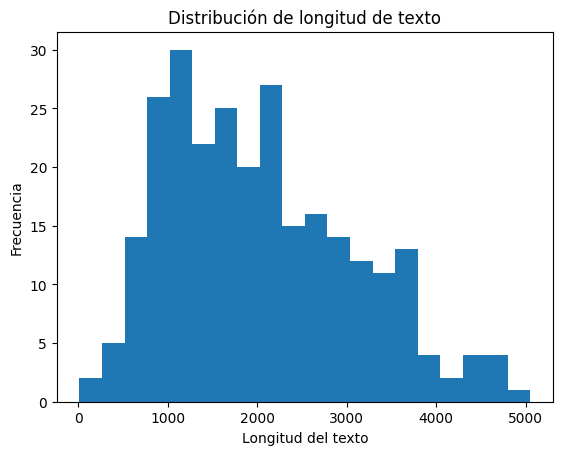

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pamelaarteaga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


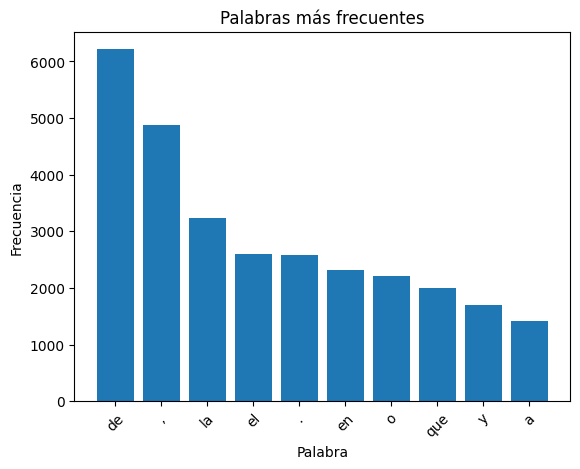

In [15]:
combined_df = pd.concat(dataframes)

combined_df['Text_Length'] = combined_df['Text'].apply(lambda x: len(x))
plt.hist(combined_df['Text_Length'], bins=20)
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitud de texto')
plt.show()

nltk.download('punkt')
combined_df['Tokenized_Text'] = combined_df['Text'].apply(word_tokenize)

all_words = [word.lower() for tokens in combined_df['Tokenized_Text'] for word in tokens]
freq_dist = FreqDist(all_words)

top_words = freq_dist.most_common(10)

words, frequencies = zip(*top_words)
plt.bar(words, frequencies)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)
plt.show()


## Wordcloud

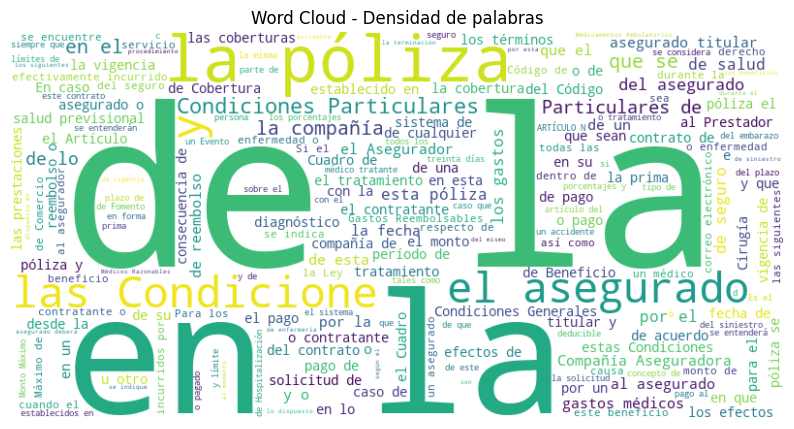

In [16]:

all_text = ' '.join(combined_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Densidad de palabras')
plt.show()